# Sales Analysis

<p style="font-family: Arial; font-size:2em;color:gold; text-align:center;">---->Abdalla Nassar<---- </p>

In [247]:
#### Import necessary libraries & read csv file 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
df=pd.read_csv("all_data.csv")
df.head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

### Drop rows of NAN 

In [248]:
df.dropna(inplace=True, axis=0)
df.head(20)
df.notnull().sum()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [249]:
print(df.shape[0])# all clean -_-
df.head(2)

186305


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


### Get rid of text in "order date" column and then convert it into datetime

In [250]:
df.dtypes
new = df['Order Date'].str.split(' ',expand=True)
df['Date'] = new[0]
df['Time'] = new[1]
df.drop("Order Date",axis=1,inplace=True)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30


### Make columns correct type ( By using __" to_numeric " __  , Convert the columns with numeric values into           integer or float ) . 
check this link to know how to use it  https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [251]:
data=["Order ID","Quantity Ordered","Price Each"]
for i in data :
    df[i]=pd.to_numeric(df[i],errors="coerce")

df.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Purchase Address     object
Date                 object
Time                 object
dtype: object

In [252]:
df.dropna(inplace=True, axis=0)
df.notnull().sum()


Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Purchase Address    185950
Date                185950
Time                185950
dtype: int64

In [253]:
df.shape[0]
data=["Order ID","Quantity Ordered"]
for i in data :
    df[i]=pd.to_numeric(df[i],errors="coerce").astype(int)

df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Date                 object
Time                 object
dtype: object

In [254]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30


### Augment data with additional columns

In [255]:
#### Add month column
df["Date"]=pd.to_datetime(df["Date"])
df['Month'] = df['Date'].dt.month
df.head(2)



/tmp/ipykernel_5599/2467889161.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"]=pd.to_datetime(df["Date"])


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46,4
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30,4


In [256]:
#### Add city column (containing city & state in this columns.) ex: df['City'][0] = 'Dallas (TX)'
city_state = df['Purchase Address'].str.extract(r',\s(.+),\s(.+)')
city_state



,0,1
0,Dallas,TX 75001
2,Boston,MA 02215
3,Los Angeles,CA 90001
4,Los Angeles,CA 90001
5,Los Angeles,CA 90001
...,...,...
186845,Los Angeles,CA 90001
186846,San Francisco,CA 94016
186847,San Francisco,CA 94016
186848,San Francisco,CA 94016


In [257]:
df['City'] = city_state[0].str.title() +" ("+ city_state[1].str.upper()+")"
df['City'] = df['City'].apply(lambda x: ''.join(i for i in x if not i.isdigit()))#to remove num from str

df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,City
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19,08:46,4,Dallas (TX )
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07,22:30,4,Boston (MA )
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14:38,4,Los Angeles (CA )


## Data Exploration!

In [258]:
#### Question 1: What was the best month for sales? How much was earned that month?
## sales = Quantity_order x price Each
df["Sales"]=df["Quantity Ordered"]*df["Price Each"]
sales = df.groupby("Month")["Sales"].sum()

print("Best Month for Sales:", sales.idxmax())
print("Earnings for the Best Month:", sales.max())

Best Month for Sales: 12
Earnings for the Best Month: 4613443.34


In [259]:
#### Question 2: What city sold the most product?

city_sales = df.groupby('City')['Quantity Ordered'].sum()
city_with_most_sales = city_sales.idxmax()

print("City with the Most Product Sales:", city_with_most_sales)

City with the Most Product Sales: San Francisco (CA )


In [260]:
#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
## Step1: Add hour column
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
orders = df.groupby('Hour')['Order ID'].count()
hours = orders[orders == orders.max()].index.tolist()
print("Hour(s) with the Most Orders:", hours)


/tmp/ipykernel_5599/1747626854.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


Hour(s) with the Most Orders: [19]


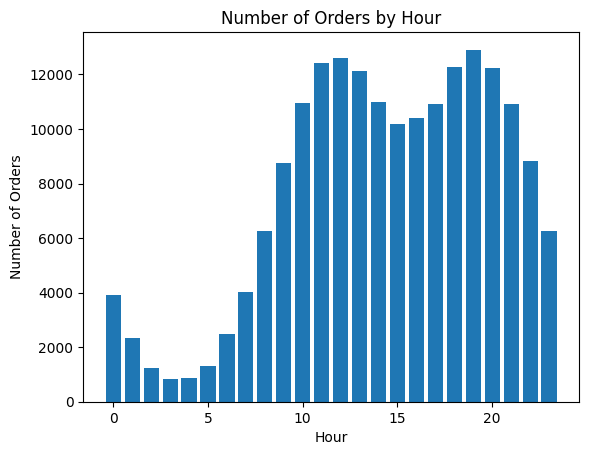

In [261]:
## Step2: show by using plot , get the most hour which clients make orders
plt.bar(orders.index, orders.values)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')

plt.show()

In [262]:
#### Question 4: What products are most often sold together?
#i dont know

In [263]:
#### What product sold the most? Why do you think it sold the most?
product_sale = df.groupby('Product')['Quantity Ordered'].sum()
product_sales = product_sale.idxmax()
print("Product with the Most Sales:", product_sales)
"""
Affordability: 
AAA batteries are generally affordable and have a relatively low price compared to other electronic products.
Their affordability makes them an attractive choice for customers who need to replenish their battery supply frequently.
"""
#thx google -_-
"""
Bulk Packaging:
The fact that AAA Batteries are sold in a 4-pack implies 
that customers can purchase multiple batteries in a single package. 
This packaging strategy may offer convenience and cost savings for customers,
leading to increased sales.
"""

Product with the Most Sales: AAA Batteries (4-pack)


'\nBulk Packaging:\nThe fact that AAA Batteries are sold in a 4-pack implies \nthat customers can purchase multiple batteries in a single package. \nThis packaging strategy may offer convenience and cost savings for customers,\nleading to increased sales.\n'